<a href="https://colab.research.google.com/github/mharrisonbaker/PASM/blob/main/PASM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import requests

In [45]:
import matplotlib.pyplot as plt

In [48]:
from wordcloud import WordCloud, STOPWORDS

In [37]:
pd.options.display.max_rows = 4000

In [41]:
url='https://github.com/mharrisonbaker/PASM/blob/main/mbaker_PASMreportMon%20Mar%20%207%2010_47_29%202022.txt?raw=true'
df=pd.read_csv(url, sep='\t', header=0, encoding='latin-1')
df.head(10)

,ISSUE ID,FY,EMP NO,EMP NAME,ORGANIZATION,PHONE,SUBJECT,PATENT TOOLS,ULID,TYPE,...,ASSIGNED POC NO,URGENCY,REQUESTOR PREFERRED CONTACT,LAST MODIFIED,CATEGORY,SUBCATEGORY,NEW INDICATOR,AIS CATEGORY,AIS SUBCATEGORY,WORK LOCATION
0,162326,22,64228,"Kuntz, Curtis",GROUP ART UNIT 2687,(571) 272-7499,16809969,Official Correspondence (OC),NaN,NaN,...,76665.0,NaN,NaN,2022-03-07 10:37:01,NaN,NaN,1.0,PE2E,Official Correspondence (OC),NaN
1,162269,22,96185,"Wu, Paysun",GROUP ART UNIT 3665,(571) 272-1528,Retrieve OC set,Official Correspondence (OC),NaN,NaN,...,76665.0,NaN,Phone,2022-03-04 12:29:19,NaN,NaN,0.0,PE2E,Official Correspondence (OC),NaN
2,162251,22,89854,"Nguyen, Linh",GROUP ART UNIT 2459,(571) 272-1013,Cannot create a second Corrected Notice of All...,Official Correspondence (OC),NaN,NaN,...,89852.0,NaN,Email,2022-03-04 10:33:58,Training Issue,NaN,0.0,PE2E,Official Correspondence (OC),Home/Hoteling
3,162225,22,71108,"Smith, Duane",GROUP ART UNIT 1737,(571) 272-1166,16935263 allowance stuck in OC,Official Correspondence (OC),NaN,NaN,...,89852.0,NaN,NaN,2022-03-03 15:04:41,Data Request,NaN,0.0,PE2E,Official Correspondence (OC),NaN
4,162213,22,91687,"Slater, Alison",GROUP ART UNIT 2487,(571) 270-0375,Two windows open,Official Correspondence (OC),NaN,Issues with Patent Automation Tools/Data,...,84501.0,NaN,Phone,2022-03-03 13:54:49,Technical System Problem,NaN,0.0,PE2E,Official Correspondence (OC),Home/Hoteling
5,162186,22,67798,"Peterson, Nichele",OPESS - CHEMICAL AND DESIGN DIVISION,(571) 272-7273,15743721,Official Correspondence (OC),PGPTLAL0303A,NaN,...,76665.0,NaN,Email,2022-03-07 10:10:27,NaN,NaN,0.0,PE2E,Official Correspondence (OC),Home/Hoteling
6,162184,22,93851,"Choy, Ka Shan",GROUP ART UNIT 2435,(571) 272-1569,Not all annotated IDSs exported from DAV shows...,Official Correspondence (OC),NaN,NaN,...,76665.0,NaN,Phone,2022-03-03 14:38:15,NaN,NaN,0.0,PE2E,Official Correspondence (OC),Telework
7,162182,22,76669,"Michener, Jennifer",GROUP ART UNIT 1776,(571) 272-1424,Creator ID/update OC XML settings,Official Correspondence (OC),NaN,NaN,...,76665.0,NaN,Email,2022-03-03 07:34:45,NaN,NaN,0.0,PE2E,Official Correspondence (OC),Home/Hoteling
8,162150,22,65913,"Norris, Gloria",OPESS - MECHANICAL & BUSINESS METHODS/L & R DI...,(571) 272-4379,notice of allow- will not submit the claims,Official Correspondence (OC),NaN,Issues with Patent Automation Tools/Data,...,64684.0,NaN,NaN,2022-03-03 01:35:31,NaN,NaN,0.0,PE2E,Official Correspondence (OC),NaN
9,162147,22,95560,"Ngo, Yen",OPESS - CHEMICAL AND DESIGN DIVISION,(703) 756-1491,issue to send out the notice of non compliant,Official Correspondence (OC),NaN,Issues with Patent Automation Tools/Data,...,89852.0,NaN,Email,2022-03-04 10:26:08,Training Issue,NaN,0.0,PE2E,Official Correspondence (OC),Home/Hoteling


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024 entries, 0 to 11023
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ISSUE ID                     11024 non-null  int64  
 1   FY                           11024 non-null  int64  
 2   EMP NO                       11024 non-null  object 
 3   EMP NAME                     11024 non-null  object 
 4   ORGANIZATION                 11014 non-null  object 
 5   PHONE                        11006 non-null  object 
 6   SUBJECT                      11023 non-null  object 
 7   PATENT TOOLS                 11024 non-null  object 
 8   ULID                         3983 non-null   object 
 9   TYPE                         9875 non-null   object 
 10  APPL ID                      5854 non-null   object 
 11  PALM                         5854 non-null   object 
 12  DAV                          5854 non-null   object 
 13  STATUS          

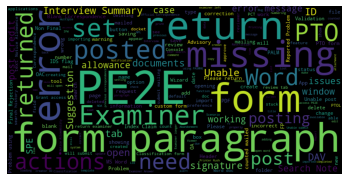

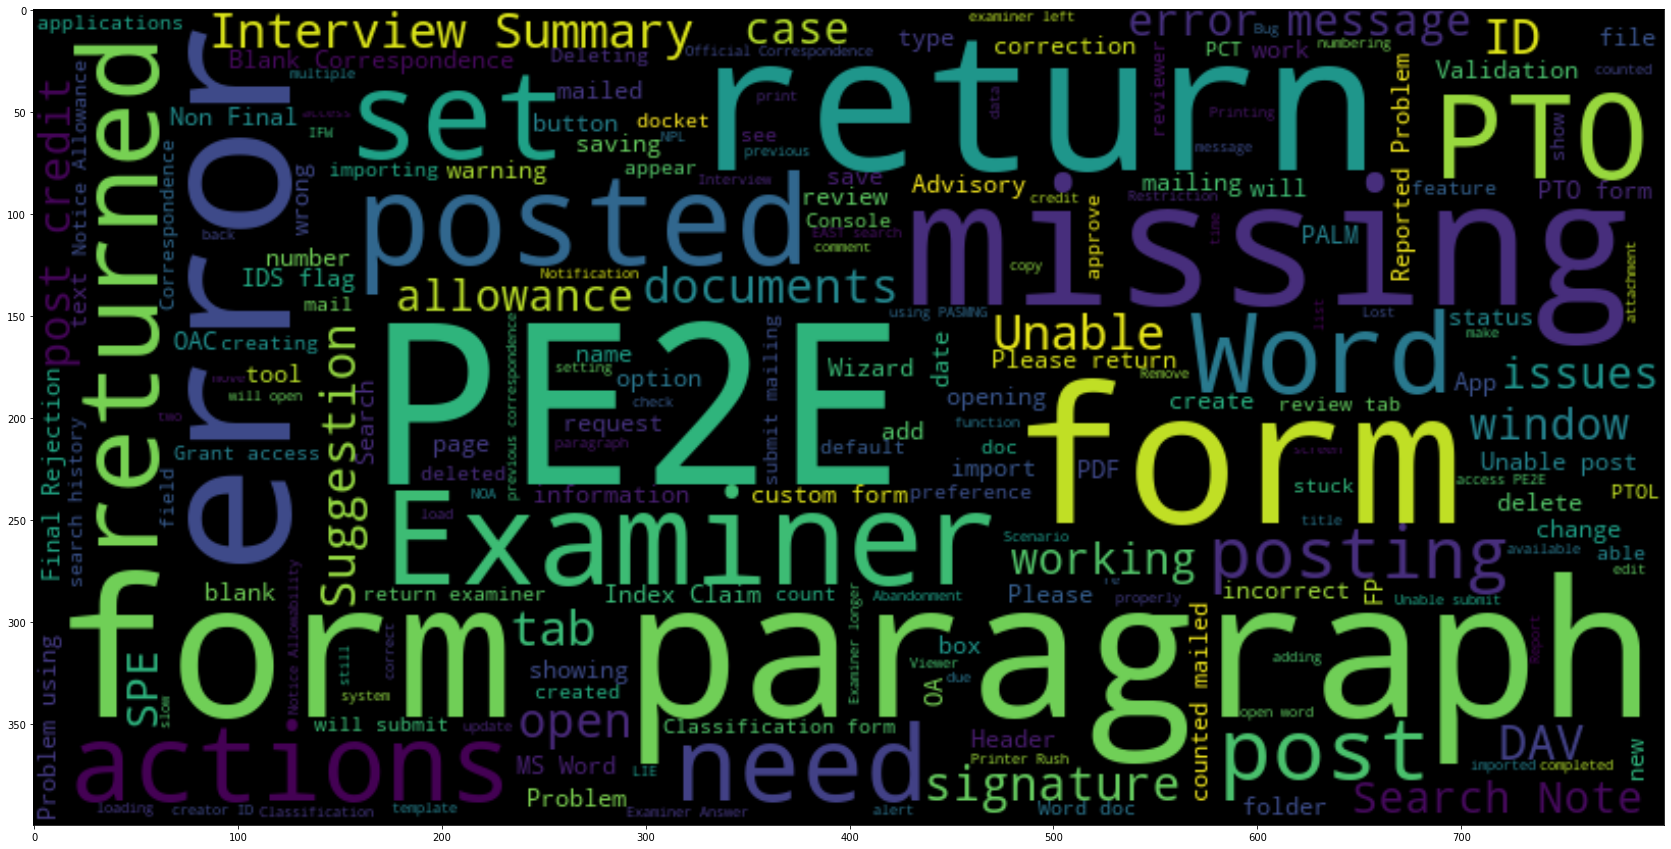

In [66]:
# https://re-thought.com/creating-wordclouds-in-python/
text = " ".join(review for review in df.SUBJECT.astype(str))
stopwords = set(STOPWORDS)
stopwords.update(["office action","action", "office", "application", "document", "case", "issue" , "OC", "OC'"])

wordcloud = WordCloud(stopwords=stopwords, width=800, height=400).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(30,15))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
selected_rows = df[~df['SUBJECT'].isna()]
sparse_matrix = word_vectorizer.fit_transform(selected_rows)
frequencies = sum(sparse_matrix).toarray()[0]
df2=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names_out(), columns=['frequency'])
df2.sort_values(['frequency'], ascending=False)

,frequency
assigned poc,2
ais category,1
last modified,1
requestor preferred,1
requestor login,1
preferred contact,1
poc no,1
patent tools,1
new indicator,1
login id,1


In [35]:
t6for col in df.columns:
    print(col)

ISSUE ID
FY
EMP NO
EMP NAME
ORGANIZATION
PHONE
SUBJECT
PATENT TOOLS
ULID
TYPE
APPL ID
PALM
DAV
STATUS
ASSIGNED POC
CREATED DT
COMPLETED DT
COMPLETED BY
FILE ATTACHMENT
EMAIL
PHONE.1
ROOM
REQUESTOR LOGIN ID
ASSIGNED POC NO
URGENCY
REQUESTOR PREFERRED CONTACT
LAST MODIFIED
CATEGORY
SUBCATEGORY
NEW INDICATOR
AIS CATEGORY
AIS SUBCATEGORY
WORK LOCATION


In [38]:
datatypes = df.dtypes
print(datatypes)

ISSUE ID                         int64
FY                               int64
EMP NO                          object
EMP NAME                        object
ORGANIZATION                    object
PHONE                           object
SUBJECT                         object
PATENT TOOLS                    object
ULID                            object
TYPE                            object
APPL ID                         object
PALM                            object
DAV                             object
STATUS                          object
ASSIGNED POC                    object
CREATED DT                      object
COMPLETED DT                    object
COMPLETED BY                    object
FILE ATTACHMENT                 object
EMAIL                           object
PHONE.1                         object
ROOM                            object
REQUESTOR LOGIN ID              object
ASSIGNED POC NO                float64
URGENCY                         object
REQUESTOR PREFERRED CONTA

In [39]:
df.isnull().sum()

ISSUE ID                           0
FY                                 0
EMP NO                             0
EMP NAME                           0
ORGANIZATION                      10
PHONE                             18
SUBJECT                            1
PATENT TOOLS                       0
ULID                            7041
TYPE                            1149
APPL ID                         5170
PALM                            5170
DAV                             5170
STATUS                             0
ASSIGNED POC                     126
CREATED DT                         0
COMPLETED DT                      78
COMPLETED BY                    3234
FILE ATTACHMENT                 9470
EMAIL                              1
PHONE.1                           18
ROOM                              25
REQUESTOR LOGIN ID                20
ASSIGNED POC NO                  228
URGENCY                         8601
REQUESTOR PREFERRED CONTACT     6402
LAST MODIFIED                      0
C